# Solving the Kepler Equation

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import newton

# parameters for S2 orbit and other constants

AU = 149.6e9  # 1 AU in meters
G = 6.67430e-11  # gravitational constant
M = 4.261e6 * 1.989e30  # mass of Sgr A* in kg

a = 970  # semi-major axis in AU
a_meters = a * AU  # semi-major axis in meters
e = 0.884  # eccentricity
T = 16 * 365.25 * 24 * 3600  # orbital period in seconds (taking orbital period to be 16 years)

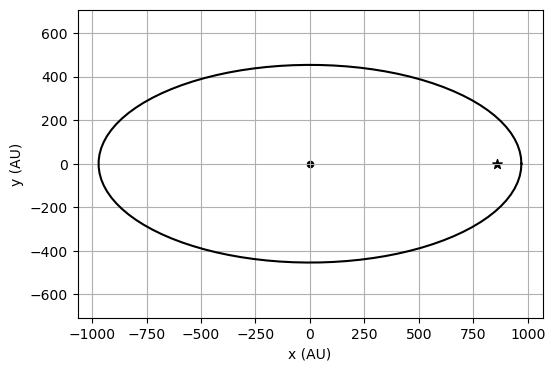

In [6]:
# just an ellipse

# with parameters
b = a * np.sqrt(1 - e**2)  # semi-minor axis

varphi = np.linspace(0, 2*np.pi, 100)  # Angle
x_ellipse = a * np.cos(varphi) #    # x-coordinates with focus at (0,0)
y_ellipse = b * np.sin(varphi)          # y-coordinates

plt.figure(figsize=(6, 4))
plt.plot(x_ellipse, y_ellipse, 'k-', label='Ellipse')
plt.scatter([0], [0], c='k', marker='o', s=20, label='Sgr A*') # (0,0)
plt.scatter(a*e, 0, c='k', marker='*', s=50, label='Sgr A*') # we placed Sgr A at the focus at a * e from the center
plt.xlabel('x (AU)')
plt.ylabel('y (AU)')
plt.axis('equal')
plt.grid(True)
plt.show()

In [7]:
# Function to solve Kepler's equation numerically for eccentric anomaly (E) given mean anomaly (M) and eccentrincity (e)

def solve_kepler(M, e, tol=1e-10):
    E = M  # initial guess
    while True:
        delta = (E - e * np.sin(E) - M) / (1 - e * np.cos(E)) # residual
        E -= delta
        if abs(delta) < tol:
            break
    return E

Increase the number of t points for smoother plots

In [8]:
 # define mean motion
n = 2 * np.pi / T 

# create time array
t = np.linspace(0, T, 50)  # increase the points for smoother orbit (from 50 to say, 1000)

# Anomalies
M = n * t  # Mean anomaly
E = np.array([solve_kepler(Mi, e) for Mi in M])  # Eccentric anomaly
varphi = 2 * np.arctan2(np.sqrt(1+e)*np.sin(E/2), np.sqrt(1-e)*np.cos(E/2))  # True anomaly

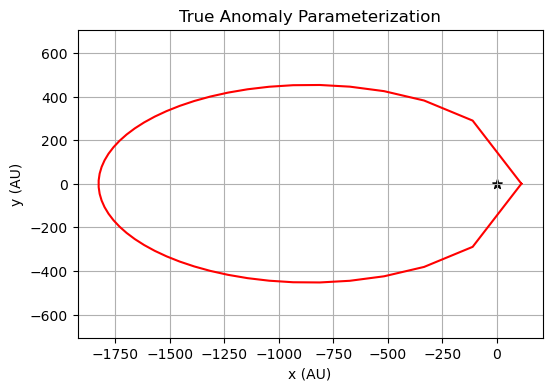

In [9]:
# True Anomaly Parameterization (which is just Polar form of our ellipse)

r = a*(1-e**2)/(1 + e*np.cos(varphi))  

x_true = r * np.cos(varphi)
y_true = r * np.sin(varphi)


plt.figure(figsize=(6, 4))
plt.plot(x_true, y_true, 'r-', label='Eccentric anomaly') 
plt.scatter(0, 0, c='k', marker='*', s=50) # focus - SgrA*
plt.xlabel('x (AU)')
plt.ylabel('y (AU)')
plt.title('True Anomaly Parameterization')
plt.grid(True)
plt.axis('equal') 
plt.show()

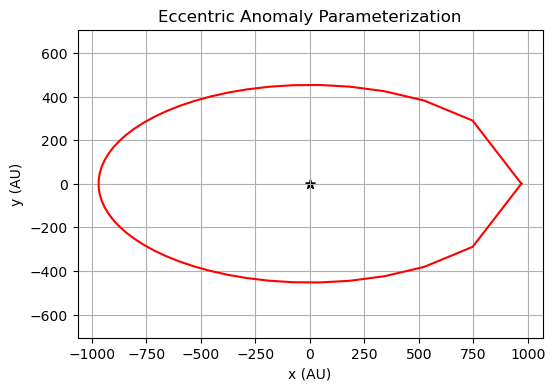

In [10]:
# Eccentric Anomaly Parameterization (Ellipse centered at origin)

x_ecc = a * np.cos(E) #- c 

# Eccentric anomaly naturally describes an ellipse centered at the origin. 
# To place at focus at the origin we have to shift the ellipse by c
# Then the radial distance (focus to orbit) in terms of E, given by r=a (1−e cosE) is valid only when the focus is at the origin.
y_ecc = b * np.sin(E)


plt.figure(figsize=(6, 4))
plt.plot(x_ecc, y_ecc, 'r-', label='Eccentric anomaly') 

plt.scatter(0, 0, c='k', marker='*', s=50)

plt.xlabel('x (AU)')
plt.ylabel('y (AU)')
plt.title('Eccentric Anomaly Parameterization')
plt.grid(True)
plt.axis('equal') 
plt.show()

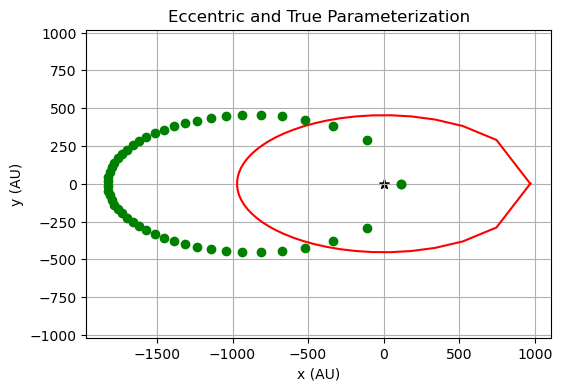

In [11]:
# comparing the two

plt.figure(figsize=(6, 4))

plt.plot(x_ecc, y_ecc, 'r-', label='Eccentric anomaly') 
plt.plot(x_true, y_true, 'go', label='True Anomaly')

# the two focal points
plt.scatter(0, 0, c='k', marker='*', s=50)

plt.xlabel('x (AU)')
plt.ylabel('y (AU)')
plt.title('Eccentric and True Parameterization')
plt.grid(True)
plt.axis('equal')  # Proper aspect ratio
plt.show()

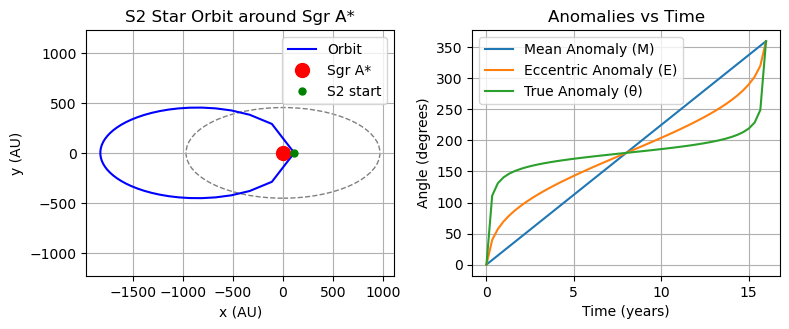

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

 # define mean motion
n = 2 * np.pi / T 


# Convert to Cartesian coordinates for plotting (in AU)
x = a * (np.cos(E) - e)  # x-coordinate in AU
y = a * np.sqrt(1 - e**2) * np.sin(E)  # y-coordinate in AU

# Plotting
plt.figure(figsize=(8, 6))

# Orbit plot (now in AU)
plt.subplot(2, 2, 1)
plt.plot(x, y, 'b-', label='Orbit')
plt.plot(0, 0, 'ro', markersize=10, label='Sgr A*')
plt.plot(x[0], y[0], 'go', markersize=5, label='S2 start')
plt.gca().add_patch(Ellipse((0, 0), 2*a, 2*a*np.sqrt(1-e**2), 
                   angle=0, fill=False, linestyle='--', color='gray'))
plt.xlabel('x (AU)')
plt.ylabel('y (AU)')
plt.title('S2 Star Orbit around Sgr A*')
plt.axis('equal')
plt.legend()
plt.grid(True)

# Anomalies vs time
plt.subplot(2, 2, 2)
plt.plot(t/(365.25*24*3600), np.degrees(M), label='Mean Anomaly (M)')
plt.plot(t/(365.25*24*3600), np.degrees(E), label='Eccentric Anomaly (E)')
plt.plot(t/(365.25*24*3600), np.degrees(varphi), label='True Anomaly (θ)')
plt.xlabel('Time (years)')
plt.ylabel('Angle (degrees)')
plt.title('Anomalies vs Time')
plt.legend()
plt.grid(True)

# Eccentric vs Mean anomaly
#plt.subplot(2, 2, 3)
#plt.plot(np.degrees(mean_anomaly), np.degrees(eccentric_anomaly))
#plt.xlabel('Mean Anomaly (M) [degrees]')
#plt.ylabel('Eccentric Anomaly (E) [degrees]')
#plt.title('Eccentric vs Mean Anomaly')
#plt.grid(True)

# True vs Eccentric anomaly
#plt.subplot(2, 2, 4)
#plt.plot(np.degrees(eccentric_anomaly), np.degrees(true_anomaly))
#plt.xlabel('Eccentric Anomaly (E) [degrees]')
#plt.ylabel('True Anomaly (θ) [degrees]')
#plt.title('True vs Eccentric Anomaly')
#plt.grid(True)

plt.tight_layout()
plt.show()

### Numerical consistency check (not important)

In [8]:
#Just a small chnage to our previous function to store history 
#This function now solves Kepler's equation and get both the final solution and the iteration history
def solve_kepler_with_history(M, e, tol=1e-15):
    history = []
    E = M  # Initial guess
    while True:
        f = E - e * np.sin(E) - M  # residual
        df = 1 - e * np.cos(E)     # derivative
        delta = f / df
        history.append((E, f, delta))
        E -= delta
        if abs(delta) < tol:
            break
    return E, np.array(history)

# Wet set M (mean anomaly) and e
M = 5.0  # (radians)
e = 0.88  

# End products of the function
E_final, history = solve_kepler_with_history(M, e)

# Create an array of iteration numbers [1, 2, 3, ..., N_iterations]
iterations = np.arange(1, len(history)+1)

print(history)

[[ 5.00000000e+00  8.43853362e-01  1.12457212e+00]
 [ 3.87542788e+00 -5.35216193e-01 -3.23687239e-01]
 [ 4.19911512e+00 -3.42802586e-02 -2.39369221e-02]
 [ 4.22305205e+00 -2.20600348e-04 -1.56051750e-04]
 [ 4.22320810e+00 -9.45775191e-09 -6.69094728e-09]
 [ 4.22320810e+00  0.00000000e+00  0.00000000e+00]]


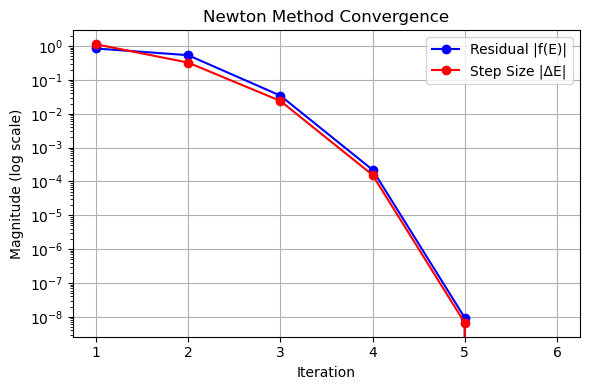

In [9]:
plt.figure(figsize=(6, 4))

# convergence plot
plt.semilogy(iterations, np.abs(history[:,1]), 'bo-', label='Residual |f(E)|') #log scale y
plt.semilogy(iterations, np.abs(history[:,2]), 'ro-', label='Step Size |ΔE|')  #log scale y
plt.xlabel('Iteration')
plt.ylabel('Magnitude (log scale)')
plt.title('Newton Method Convergence')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

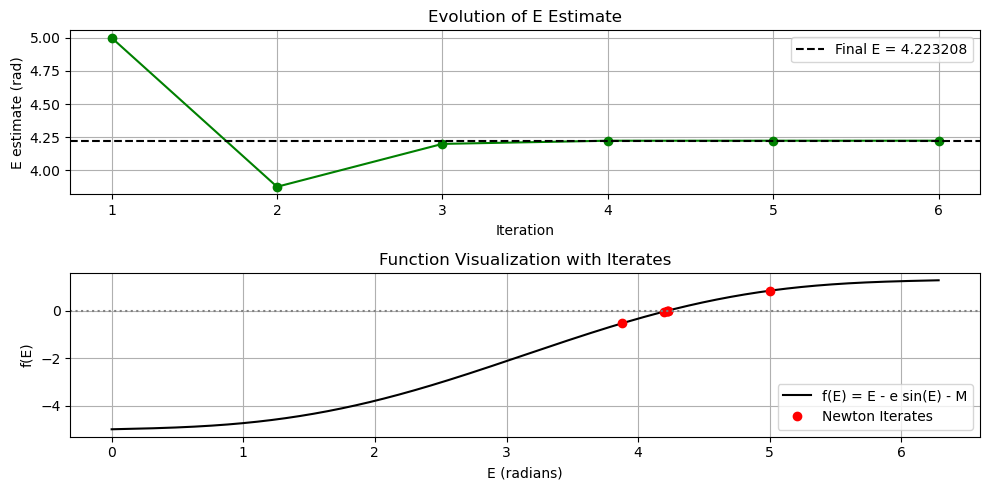

In [10]:
# Plot 3: E estimate vs iteration

plt.figure(figsize=(10, 5))
plt.subplot(2, 1, 1)
plt.plot(iterations, history[:,0], 'go-')
plt.axhline(E_final, color='k', linestyle='--', label=f'Final E = {E_final:.6f}')
plt.xlabel('Iteration')
plt.ylabel('E estimate (rad)')
plt.title('Evolution of E Estimate')
plt.legend()
plt.grid(True)

# Plot 4: Function visualization
E_vals = np.linspace(0, 2*np.pi, 1000)
f_vals = E_vals - e * np.sin(E_vals) - M
plt.subplot(2, 1, 2)
plt.plot(E_vals, f_vals, 'k-', label='f(E) = E - e sin(E) - M')
plt.plot(history[:,0], history[:,1], 'ro', label='Newton Iterates')
plt.axhline(0, color='gray', linestyle=':')
plt.xlabel('E (radians)')
plt.ylabel('f(E)')
plt.title('Function Visualization with Iterates')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Orbital plane to Sky

In [124]:
# Parameters of the orbit
a = 1000        # semi-major axis [AU]
e = 0.88        # eccentricity
i_deg = 133     # inclination
Omega_deg = 227 # longitude of ascending node
omega_deg = 66  # argument of pericenter
# we do not want time yet - we will include later

# Convert to radians
i = np.radians(i_deg)
Omega = np.radians(Omega_deg)
omega = np.radians(omega_deg)



# We define rotation matrices
def R_z(theta):
    return np.array([
        [np.cos(theta), -np.sin(theta), 0],
        [np.sin(theta), np.cos(theta), 0],
        [0, 0, 1]
    ])

def R_x(theta):
    return np.array([
        [1, 0, 0],
        [0, np.cos(theta), -np.sin(theta)],
        [0, np.sin(theta), np.cos(theta)]
    ])

# Combined rotation
R = R_z(-Omega) @ R_x(-i) @ R_z(-omega)

In [125]:
#Just ploting the orbit to see what rotation does
# true anomaly values
varphi = np.linspace(0, 2*np.pi, 500)
r = a*(1 - e**2)/(1 + e*np.cos(varphi))

# Orbital plane
x_orb = r * np.cos(varphi)
y_orb = r * np.sin(varphi)
z_orb = np.zeros_like(x_orb)

# Apply rotation to get sky coordinates
r_sky = R @ np.vstack([x_orb, y_orb, z_orb])
x_sky, y_sky, z_sky = r_sky

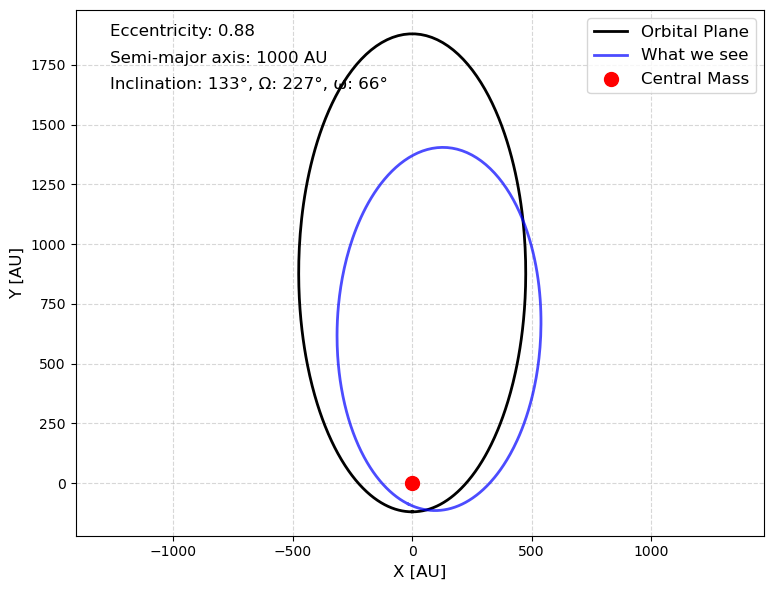

In [126]:
# Create single figure
plt.figure(figsize=(8,6))
# Plot orbital plane (black) -  I changed the axis to resemble the actual orbit (an extra minus sign due to flip)
plt.plot(y_orb, -x_orb,  'k-', label='Orbital Plane', linewidth=2)
# Plot sky projection (blue)
plt.plot(y_sky, x_sky, 'b-', label='What we see', linewidth=2, alpha=0.7)
# Mark central mass
plt.scatter([0], [0], color='red', s=100, label='Central Mass', zorder=10)
# Labels and title
plt.xlabel('X [AU]', fontsize=12)
plt.ylabel('Y [AU]', fontsize=12)
# Equal aspect ratio and grid
plt.axis('equal')
plt.grid(True, linestyle='--', alpha=0.5)
# Legend
plt.legend(fontsize=12, loc='upper right')
# Annotations
plt.text(0.05, 0.95, f'Eccentricity: {e}', 
         transform=plt.gca().transAxes, fontsize=12)
plt.text(0.05, 0.90, f'Semi-major axis: {a} AU', 
         transform=plt.gca().transAxes, fontsize=12)
plt.text(0.05, 0.85, f'Inclination: {i_deg}°, Ω: {Omega_deg}°, ω: {omega_deg}°', transform=plt.gca().transAxes, fontsize=12)

plt.tight_layout()
plt.show()

## Kepler orbit (full model)

In [127]:
# Here we are trying to write a full function which takes the orbital parameters as input and gives us (x,y) coordinates of the S2 star
# However, to compare with data, we need to convert (x, y) to (RA, Dec)

def kepler_orbit(a, e, omega_deg, Omega_deg, inc_deg, M_BH, times):
    # Convert angles to radians
    omega = np.radians(omega_deg)
    Omega = np.radians(Omega_deg)
    inc = np.radians(inc_deg)
    
    # Mean motion (rad/yr)
    n = np.sqrt(M_BH / a**3)
    
    # Initialize output arrays - sky coordinates
    x_sky, y_sky = np.zeros_like(times), np.zeros_like(times)
    
    for i, t in enumerate(times):
        # Mean anomaly
        M = n * t
        
        # Solve Kepler's equation for eccentric anomaly E
        def f(E):
            return E - e * np.sin(E) - M
        E = newton(f, x0=M) 
        
        # True anomaly
        varphi = 2 * np.arctan2(np.sqrt(1 + e) * np.sin(E/2), np.sqrt(1 - e) * np.cos(E/2))
        
        # Radial distance
        r = a * (1 - e * np.cos(E))
        
        # Position in orbital plane
        x_orb = r * np.cos(varphi)
        y_orb = r * np.sin(varphi)
        z_orb = 0
        
        # Rotate to sky coordinates
        r_sky = R @ np.array([x_orb, y_orb, z_orb])
        x_sky[i], y_sky[i], _ = r_sky
    
    return x_sky, y_sky

## Including GR corrections

In [133]:
# Adding the precession for an approximate Schwarzschild orbit
# Its the same function as above, for approximately Schwarzschild orbits

def gr_anomaly_orbit(a, e, omega_deg, Omega_deg, inc_deg, M_BH, times):
    # Constants
    c = 63241  # Speed of light in AU/yr
    omega = np.radians(omega_deg)  # Argument of periapsis (rad)
    Omega = np.radians(Omega_deg)  # Longitude of ascending node (rad)
    inc = np.radians(inc_deg)      # Inclination (rad)
    
    # Mean motion 
    n = np.sqrt(M_BH / a**3)
    P = 2 * np.pi / n
    
    # precession rate (rad/yr)
    delta_omega = 6 * np.pi * M_BH / (c**2 * a * (1 - e**2)) / P
    
    # Initialize sky coordinates
    x_sky, y_sky = np.zeros_like(times), np.zeros_like(times)

    
    for i, t in enumerate(times):
        # Mean anomaly with precession
        M = n * t + delta_omega * t
        
        # Solve for eccentric anomaly (Kepler's equation)
        def f(E):
            return E - e * np.sin(E) - M
        E = newton(f, M)
        
        # True anomaly (with GR precession)
        varphi = 2 * np.arctan2(np.sqrt(1 + e) * np.sin(E/2), np.sqrt(1 - e) * np.cos(E/2))
        varphi_gr = varphi + delta_omega * t
        
        # Position in the orbital plane
        r = a * (1 - e * np.cos(E))  # Radial distance
        x_orb = r * np.cos(varphi_gr)
        y_orb = r * np.sin(varphi_gr)
        z_orb = 0
        
        # Rotate to sky coordinates
        r_sky = R @ np.array([x_orb, y_orb, z_orb])
        x_sky[i], y_sky[i], _ = r_sky
    
    return x_sky, y_sky

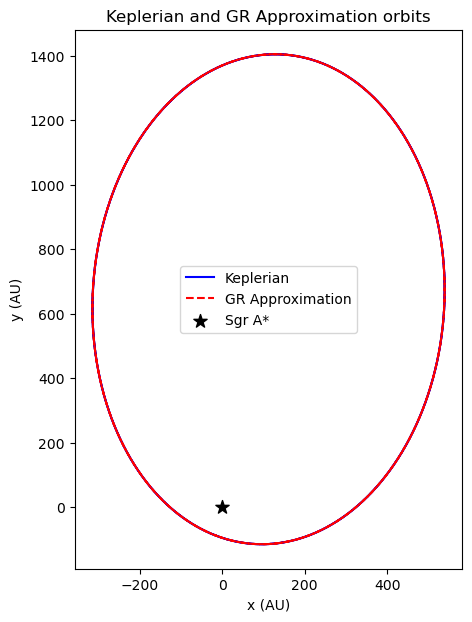

In [144]:
# Plot both the orbits

# Parameters
M_BH = 5e6  # Solar masses
a = 1000      # AU
e = 0.88
inc = 135     # deg
omega = 65    # deg
Omega = 225   # deg
times = np.linspace(0, 4*np.pi*np.sqrt(a**3/M_BH), 10000)

# Compute orbits
x_kepler, y_kepler = kepler_orbit(a, e, omega, Omega, inc, M_BH, times)  # Keplerian
X_GR, Y_GR = gr_anomaly_orbit(a, e, omega, Omega, inc, M_BH, times)  # GR approximation

# Plot
plt.figure(figsize=(5, 7))

plt.plot(y_kepler, x_kepler,'b-', label="Keplerian")
plt.plot(Y_GR, X_GR,'r--', label="GR Approximation")
plt.scatter([0], [0], c='k', marker='*', s=100, label="Sgr A*")
plt.xlabel("x (AU)"); plt.ylabel("y (AU)")
plt.legend(); plt.title("Keplerian and GR Approximation orbits");


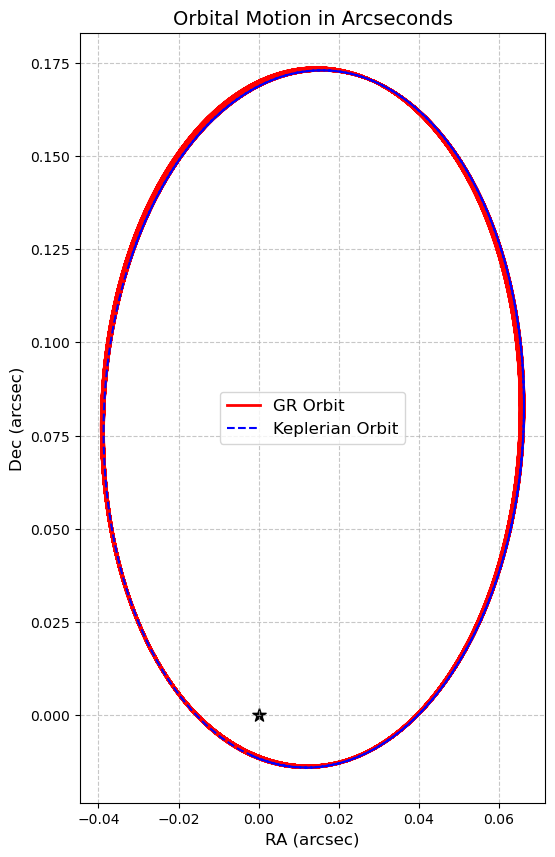

In [169]:
# In terms of RA and Dec

def sky_to_radec(x_sky, y_sky, distance_pc=8122):
    scale = 1 / distance_pc  # Conversion factor: AU → arcsec (1 AU at 1 pc = 1 arcsec)
    ra_arcsec = x_sky * scale
    dec_arcsec = y_sky * scale
    return ra_arcsec, dec_arcsec

P = 2 * np.pi * np.sqrt(a**3 / M_BH)  # Orbital period in years
    
# Generate orbits (using your previous functions)
x_gr, y_gr = gr_anomaly_orbit(a=1000, e=0.88, omega_deg=65, Omega_deg=225, inc_deg=135, M_BH=4.3e6, times=np.linspace(0, 100* P, 20000))
x_kep, y_kep = kepler_orbit(a=1000, e=0.88, omega_deg=65, Omega_deg=225, inc_deg=135, M_BH=4.3e6, times=np.linspace(0, 2*P, 1000))

# Convert to RA/Dec (arcsec)
ra_gr_arcsec, dec_gr_arcsec = sky_to_radec(y_gr, x_gr)  # GR orbit
ra_kep_arcsec, dec_kep_arcsec = sky_to_radec(y_kep, x_kep)  # Keplerian orbit

plt.figure(figsize=(6, 10))

plt.plot(ra_gr_arcsec, dec_gr_arcsec, label='GR Orbit', color='red', linewidth=2)
plt.plot(ra_kep_arcsec, dec_kep_arcsec, label='Keplerian Orbit', color='blue', linestyle='--', linewidth=1.5)
plt.xlabel('RA (arcsec)', fontsize=12)
plt.ylabel('Dec (arcsec)', fontsize=12)
#plt.gca().invert_xaxis()  # RA increases leftward (eastward)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=12)
plt.scatter([0], [0], c='k', marker='*', s=100, label="Sgr A*")
plt.title('Orbital Motion in Arcseconds', fontsize=14)
plt.show()


# Exercise

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Given parameters
a = 1000  # semi-major axis in AU
e = 0.88  # eccentricity
mu = 5.03e7  # G*M in AU^3/yr^2 (for 4 million solar masses)

# Orbital period
T = 2 * np.pi * np.sqrt(a**3 / mu)

# True anomaly array
phi = np.linspace(0, 2*np.pi, 1000)

# Radius as a function of true anomaly
r = a * (1 - e**2) / (1 + e*np.cos(phi))

# Convert r, phi to Cartesian for plotting orbit
x = r * np.cos(phi)
y = r * np.sin(phi)

# Plot the orbit
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Orbit in Cartesian coordinates
ax[0].plot(x, y, label='Orbit')
ax[0].scatter([0], [0], color='red', label='Focus (central mass)')
ax[0].scatter([450*np.cos(2.17)], [450*np.sin(2.17)], color='green', label=r'$r=450$ AU')
ax[0].scatter([450*np.cos(4.11)], [450*np.sin(4.11)], color='green')
ax[0].set_xlabel('x [AU]')
ax[0].set_ylabel('y [AU]')
ax[0].set_title('Keplerian Orbit')
ax[0].axis('equal')
ax[0].legend()

# r(t) and v(t) over time
M = np.linspace(0, 2*np.pi, 1000)
t = M/(2*np.pi) * T

# Solve Kepler's equation for E(M)
def kepler_E(M, e, tol=1e-10):
    E = M.copy()
    for _ in range(100):
        delta_E = (E - e*np.sin(E) - M) / (1 - e*np.cos(E))
        E -= delta_E
        if np.all(np.abs(delta_E) < tol):
            break
    return E

E = kepler_E(M, e)
r_t = a*(1-e*np.cos(E))
v_t = np.sqrt(mu*(2/r_t - 1/a))

# r(t) and v(t)
ax[1].plot(t, r_t, label=r'$r(t)$ [AU]')
ax[1].plot(t, v_t, label=r'$v(t)$ [AU/yr]')
ax[1].set_xlabel('Time [yr]')
ax[1].set_title('Radius and Velocity vs Time')
ax[1].legend()
plt.tight_layout()
plt.show()
